In [299]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

### Checking all possible stations names

In [300]:
df_2021 = pd.read_csv('2021 metų orai.csv')
df_2022 = pd.read_csv('2022 metų orai.csv')

distinct_values = df_2021.drop_duplicates(subset='Station Name').reset_index()
distinct_values[['Station Name']]

,Station Name
0,Biržų AMS
1,Dotnuvos AMS
2,Dūkšto AMS
3,Kauno AMS
4,Klaipėdos AMS
5,Kybartų AMS
6,Laukuvos AMS
7,Lazdijų AMS
8,Nidos AMS
9,Panevėžio AMS


### Replacing station names with town names

In [301]:
replace_dict = {
    'Biržų AMS': 'Biržai',
    'Dotnuvos AMS': 'Dotnuva',
    'Dūkšto AMS': 'Dūkštas',
    'Kauno AMS': 'Kaunas',
    'Klaipėdos AMS': 'Klaipėda',
    'Kybartų AMS': 'Kybartai',
    'Laukuvos AMS': 'Laukuva',
    'Lazdijų AMS': 'Lazdijai',
    'Nidos AMS': 'Nida',
    'Panevėžio AMS': 'Panevėžys',
    'Raseinių AMS': 'Raseiniai',
    'Šiaulių AMS': 'Šiauliai',
    'Šilutės AMS': 'Šilutė',
    'Telšių AMS': 'Telšiai',
    'Ukmergės AMS': 'Ukmergė',
    'Utenos AMS': 'Utena',
    'Varėnos AMS': 'Varėna',
    'Vilniaus AMS': 'Vilnius'
}

df_2021['Station Name'] = df_2021['Station Name'].replace(replace_dict)
df_2022['Station Name'] = df_2022['Station Name'].replace(replace_dict)

df_2021 = df_2021.rename(columns={'Station Name': 'Town Name'})
df_2021 = df_2021.rename(columns={'Observation Time (UTC)': 'Date'})
df_2022 = df_2022.rename(columns={'Station Name': 'Town Name'})
df_2022 = df_2022.rename(columns={'Observation Time (UTC)': 'Date'})

distinct_values = df_2021.drop_duplicates(subset='Town Name').reset_index()
distinct_values[['Town Name']]

,Town Name
0,Biržai
1,Dotnuva
2,Dūkštas
3,Kaunas
4,Klaipėda
5,Kybartai
6,Laukuva
7,Lazdijai
8,Nida
9,Panevėžys


### Creating dataframes for each year (night and day)

In [302]:
df_2021['Date'] = pd.to_datetime(df_2021['Date'])
df_2022['Date'] = pd.to_datetime(df_2022['Date'])

df_2021_day_night_data = df_2021.copy()
df_2022_day_night_data = df_2022.copy()

### Filtering the dataframe to include only specific time range data

In [303]:
start_time = '2021-01-01 18:00:00'
end_time = '2021-12-31 6:00:00'

night_2021 = df_2021_day_night_data[(df_2021_day_night_data['Date'].dt.time >= pd.to_datetime(start_time).time()) | (df_2021_day_night_data['Date'].dt.time <= pd.to_datetime(end_time).time())]

In [304]:
start_time = '2021-01-01 6:00:00'
end_time = '2021-12-31 18:00:00'

day_2021 = df_2021_day_night_data[(df_2021_day_night_data['Date'].dt.time >= pd.to_datetime(start_time).time()) & (df_2021_day_night_data['Date'].dt.time <= pd.to_datetime(end_time).time())]

In [305]:
start_time = '2022-01-01 18:00:00'
end_time = '2022-12-31 6:00:00'

night_2022 = df_2022_day_night_data[(df_2022_day_night_data['Date'].dt.time >= pd.to_datetime(start_time).time()) | (df_2022_day_night_data['Date'].dt.time <= pd.to_datetime(end_time).time())]

In [306]:
start_time = '2022-01-01 6:00:00'
end_time = '2022-12-31 18:00:00'

day_2022 = df_2022_day_night_data[(df_2022_day_night_data['Date'].dt.time >= pd.to_datetime(start_time).time()) & (df_2022_day_night_data['Date'].dt.time <= pd.to_datetime(end_time).time())]

### Finding Average Monthly Temperature for the Year 2021

In [307]:
monthly_2021_avg = df_2021.groupby(df_2021['Date'].dt.month)['Air Temperature'].mean().reset_index().round(2)
monthly_2021_avg.columns = ['Month', 'Air Temperature']
monthly_2021_avg[['Month', 'Air Temperature']].style.format({'Air Temperature': '{:.1f}'}).hide(axis='index')

Month,Air Temperature
1,-3.3
2,-5.4
3,1.7
4,5.9
5,11.2
6,19.3
7,22.1
8,16.2
9,11.5
10,8.3


### Finding Average Monthly Temperature for the Year 2022

In [308]:
monthly_2022_avg = df_2022.groupby(df_2022['Date'].dt.month)['Air Temperature'].mean().reset_index().round(1)
monthly_2022_avg.columns = ['Month', 'Air Temperature']
monthly_2022_avg = monthly_2022_avg[['Month', 'Air Temperature']]
monthly_2022_avg.style.format({'Air Temperature': '{:.1f}'}).hide(axis='index')

Month,Air Temperature
1,-0.2
2,1.2
3,1.6
4,5.8
5,10.7
6,17.4
7,17.7
8,20.4
9,10.6
10,9.9


### Average Monthly Temperature Graph for 2021-2022

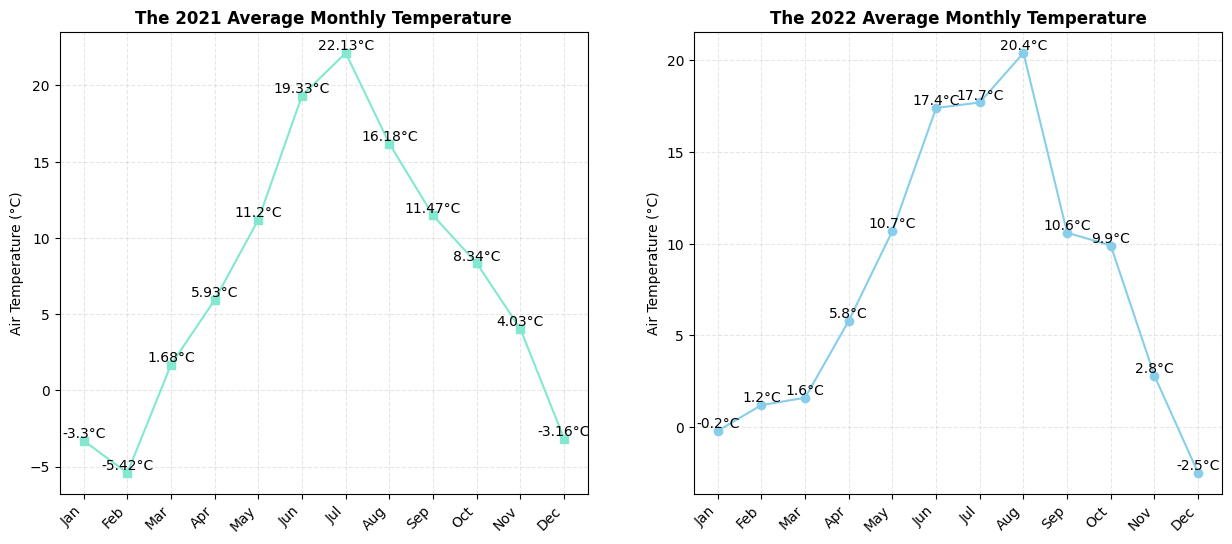

In [309]:
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

axes[1].plot(monthly_2022_avg['Month'], monthly_2022_avg['Air Temperature'], marker='o', linestyle='-', color='skyblue')
axes[1].grid(True, linestyle='--', alpha=0.3)
axes[1].set_ylabel('Air Temperature (°C)')
axes[1].set_title('The 2022 Average Monthly Temperature', fontweight='bold')
axes[1].set_xticks(monthly_2022_avg['Month'])
axes[1].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_2022_avg['Air Temperature']):
    axes[1].text(monthly_2022_avg['Month'].iloc[i], txt, f"{txt}°C", ha='center', va='bottom', fontsize=10)

axes[0].plot(monthly_2021_avg['Month'], monthly_2021_avg['Air Temperature'], marker='s', linestyle='-', color='#82e8d0')
axes[0].grid(True, linestyle='--', alpha=0.3)
axes[0].set_ylabel('Air Temperature (°C)')
axes[0].set_title('The 2021 Average Monthly Temperature', fontweight='bold')
axes[0].set_xticks(monthly_2021_avg['Month'])
axes[0].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_2021_avg['Air Temperature']):
    axes[0].text(monthly_2021_avg['Month'].iloc[i], txt, f"{txt}°C", ha='center', va='bottom', fontsize=10)

plt.show()

### Finding the Average Temperature for 2022

In [310]:
average_overall_2022 = np.mean(monthly_2022_avg.values).round(2)
print(f"Average Temperature: {average_overall_2022}")


Average Temperature: 7.22


### Finding the Average Temperature for 2021

In [311]:
average_overall_2021 = np.mean(monthly_2021_avg.values).round(2)
print(f"Average Temperature: {average_overall_2021}")

Average Temperature: 6.93


### Average Temperature Graph for 2021-2022 Period

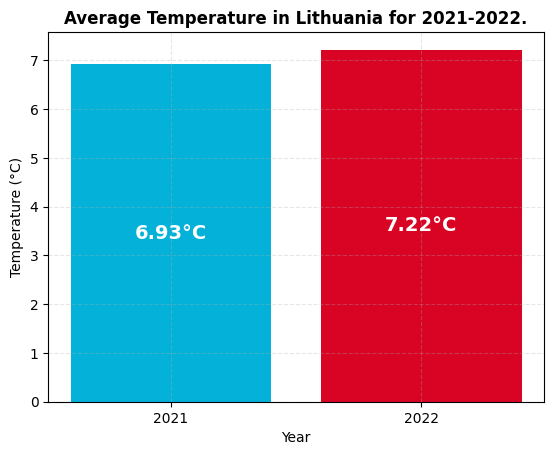

In [312]:
years = ['2021', '2022']
averages = [average_overall_2021, average_overall_2022]

bars = plt.bar(years, averages, color=['#04b2d9', '#d90424'])

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature in Lithuania for 2021-2022.', fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.3, zorder=0)

for bar, avg in zip(bars, averages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{avg}°C", ha='center', va='center', color='white', fontsize=14, fontweight='bold')

plt.show()

### Average Daytime/Nighttime Temperatures for the 2021-2022 Period

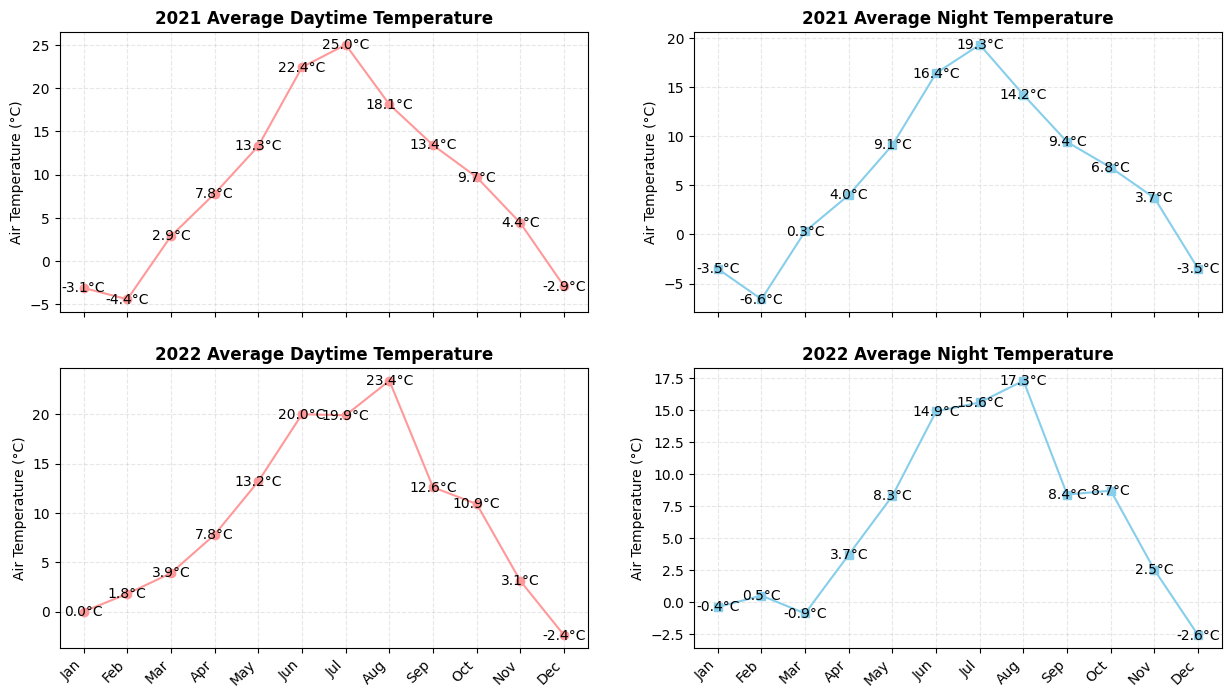

In [313]:
monthly_day_avg = day_2021.groupby([day_2021['Date'].dt.month]).mean().reset_index().round(1)
monthly_avg_night = night_2021.groupby([night_2021['Date'].dt.month]).mean().reset_index().round(1)
monthly_day_avg_2022 = day_2022.groupby([day_2022['Date'].dt.month]).mean().reset_index().round(1)
monthly_avg_night_2022 = night_2022.groupby([night_2022['Date'].dt.month]).mean().reset_index().round(1)

month_names = [calendar.month_abbr[i] for i in range(1, 13)]

fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)

axes[0, 0].plot(monthly_day_avg['Date'], monthly_day_avg['Air Temperature'], label='Dienos temp.', marker='o', linestyle='-', color='#FF9999')
axes[0, 0].grid(True, linestyle='--', alpha=0.3)
axes[0, 0].set_ylabel('Air Temperature (°C)')
axes[0, 0].set_title('2021 Average Daytime Temperature', fontweight='bold')
axes[0, 0].set_xticks(monthly_day_avg['Date'])
axes[0, 0].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_day_avg['Air Temperature']):
    axes[0, 0].text(monthly_day_avg['Date'].iloc[i], txt, f"{txt}°C", ha='center', va='center', fontsize=10)

axes[0, 1].plot(monthly_avg_night['Date'], monthly_avg_night['Air Temperature'], label='Nakties temp.', marker='s', linestyle='-', color='skyblue')
axes[0, 1].grid(True, linestyle='--', alpha=0.3)
axes[0, 1].set_ylabel('Air Temperature (°C)')
axes[0, 1].set_title('2021 Average Night Temperature', fontweight='bold')
axes[0, 1].set_xticks(monthly_avg_night['Date'])
axes[0, 1].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_avg_night['Air Temperature']):
    axes[0, 1].text(monthly_avg_night['Date'].iloc[i], txt, f"{txt}°C", ha='center', va='center', fontsize=10)

axes[1, 0].plot(monthly_day_avg_2022['Date'], monthly_day_avg_2022['Air Temperature'], label='Dienos temp.', marker='o', linestyle='-', color='#FF9999')
axes[1, 0].grid(True, linestyle='--', alpha=0.3)
axes[1, 0].set_ylabel('Air Temperature (°C)')
axes[1, 0].set_title('2022 Average Daytime Temperature', fontweight='bold')
axes[1, 0].set_xticks(monthly_day_avg_2022['Date'])
axes[1, 0].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_day_avg_2022['Air Temperature']):
    axes[1, 0].text(monthly_day_avg_2022['Date'].iloc[i], txt, f"{txt}°C", ha='center', va='center', fontsize=10)

axes[1, 1].plot(monthly_avg_night_2022['Date'], monthly_avg_night_2022['Air Temperature'], label='Nakties temp.', marker='s', linestyle='-', color='skyblue')
axes[1, 1].grid(True, linestyle='--', alpha=0.3)
axes[1, 1].set_ylabel('Air Temperature (°C)')
axes[1, 1].set_title('2022 Average Night Temperature', fontweight='bold')
axes[1, 1].set_xticks(monthly_avg_night_2022['Date'])
axes[1, 1].set_xticklabels(month_names, rotation=45, ha='right')
for i, txt in enumerate(monthly_avg_night_2022['Air Temperature']):
    axes[1, 1].text(monthly_avg_night_2022['Date'].iloc[i], txt, f"{txt}°C", ha='center', va='center', fontsize=10)

plt.show()

### Finding the Highest and Lowest Temperatures of 2021-2022

###

In [314]:
max_2021 = df_2021[df_2021["Air Temperature"] == df_2021['Air Temperature'].max()][['Town Name', 'Date', 'Air Temperature']]
max_2021

,Town Name,Date,Air Temperature
84671,Dotnuva,2021-07-16 14:00:00,34.6


In [315]:
min_2021 = df_2021[df_2021["Air Temperature"] == df_2021['Air Temperature'].min()][['Town Name', 'Date', 'Air Temperature']]
min_2021

,Town Name,Date,Air Temperature
7034,Kybartai,2021-01-17 05:00:00,-27.2


In [316]:
max_2022 = df_2022[df_2022["Air Temperature"] == df_2022['Air Temperature'].max()][['Town Name', 'Date', 'Air Temperature']]
max_2022

,Town Name,Date,Air Temperature
99467,Klaipėda,2022-08-19 11:00:00,32.3


In [317]:
min_2022 = df_2022[df_2022["Air Temperature"] == df_2022['Air Temperature'].min()][['Town Name', 'Date', 'Air Temperature']]
min_2022

,Town Name,Date,Air Temperature
150580,Raseiniai,2022-12-15 04:00:00,-18.3


### Graph of Highest and Lowest Temperatures for the 2021-2022 Period

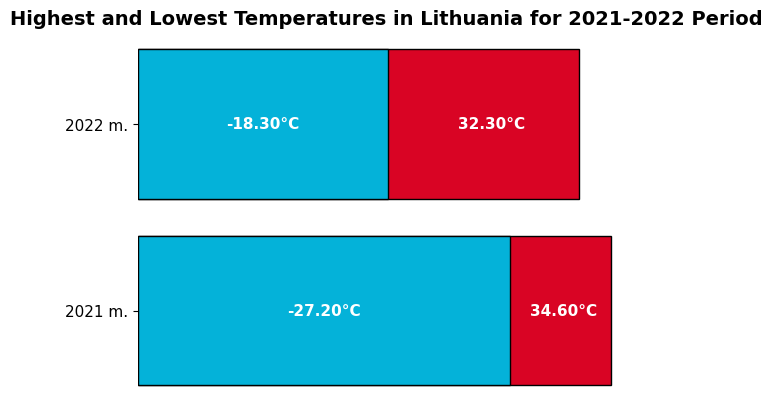

In [318]:
U1 = np.concatenate([max_2021['Air Temperature'], max_2022['Air Temperature']])
U2 = np.concatenate([min_2021['Air Temperature'], min_2022['Air Temperature']])

z1 = np.arange(len(U1))

fig, ax = plt.subplots()

ax.barh(z1, U1, color='#d90424', label='U1', edgecolor='black', linewidth=1)
ax.barh(z1, -U2, color='#04b2d9', label='U2', edgecolor='black', linewidth=1)

spacing_factors_U1 = [1.11, 1.25]

for i, (u1, u2, spacing_factor) in enumerate(zip(U1, U2, spacing_factors_U1)):
    ax.text(u1 / spacing_factor, i, f'{u1:.2f}°C', color='white', ha='center', va='center', fontweight='bold', fontsize=11)

for i, u2 in enumerate(U2):
    ax.text(-u2 / 2, i, f'{u2:.2f}°C', color='white', ha='center', va='center', fontweight='bold', fontsize=11)

ax.set_title('Highest and Lowest Temperatures in Lithuania for 2021-2022 Period', fontsize=14, fontweight='bold')
ax.set_yticks(z1)
ax.set_yticklabels(['2021 m.', '2022 m.'] , fontsize=11)
ax.set_xticks([])
ax.set_xticklabels([])
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

### Finding Average Precipitation for the Year 2021

In [319]:
precipitation_2021 = df_2021.groupby([df_2021['Date'].dt.year, 'Town Name']).mean().reset_index()
precipitation_2021['Precipitation'] = (precipitation_2021['Precipitation'] * 1000).round(2)
precipitation_2021[['Town Name','Precipitation','Date']].sort_values(by='Precipitation', ascending=False)

,Town Name,Precipitation,Date
14,Varėna,91.92,2021
4,Klaipėda,89.13,2021
6,Laukuva,84.28,2021
15,Vilnius,83.88,2021
0,Biržai,82.37,2021
11,Telšiai,80.12,2021
12,Ukmergė,79.60,2021
2,Dūkštas,75.80,2021
16,Šiauliai,75.57,2021
17,Šilutė,75.52,2021


### Finding Average Precipitation for the Year 2022

In [320]:
precipitation_2022 = df_2022.groupby([df_2022['Date'].dt.year, 'Town Name']).mean().reset_index()
precipitation_2022['Precipitation'] = (precipitation_2022['Precipitation'] * 1000).round(2)
precipitation_2022[['Town Name','Precipitation','Date']].sort_values(by='Precipitation', ascending=False)

,Town Name,Precipitation,Date
13,Utena,92.19,2022
14,Varėna,85.57,2022
15,Vilnius,82.82,2022
6,Laukuva,82.28,2022
2,Dūkštas,77.73,2022
8,Nida,73.95,2022
1,Dotnuva,71.80,2022
9,Panevėžys,70.72,2022
0,Biržai,69.90,2022
16,Šiauliai,69.83,2022


### Graph of Average Precipitation for the 2021-2022 Period

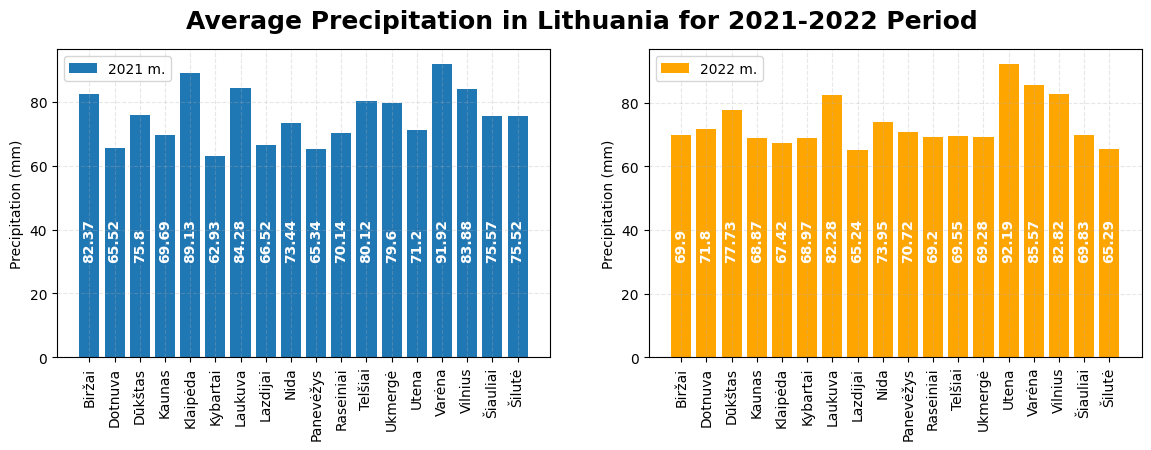

In [321]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

plt.suptitle('Average Precipitation in Lithuania for 2021-2022 Period', fontsize=18, fontweight='bold')

axes[0].bar(precipitation_2021['Town Name'], precipitation_2021['Precipitation'], label='2021 m.')
axes[0].set_xticks(range(len(precipitation_2021['Town Name'])))
axes[0].set_xticklabels(precipitation_2021['Town Name'], rotation=90, ha='center')
axes[0].grid(True, linestyle='--', alpha=0.3)
axes[0].set_ylabel('Precipitation (mm)')
axes[0].legend(loc='upper left')


axes[1].bar(precipitation_2022['Town Name'], precipitation_2022['Precipitation'], color='orange', label='2022 m.')
axes[1].set_xticks(range(len(precipitation_2022['Town Name'])))
axes[1].set_xticklabels(precipitation_2022['Town Name'], rotation=90, ha='center')
axes[1].grid(True, linestyle='--', alpha=0.3)
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend(loc='upper left')

center_level = precipitation_2021['Precipitation'].max() / 3

for i, txt in enumerate(precipitation_2021['Precipitation']):
   index_value = precipitation_2021.index[i]
   y_center = center_level
   axes[0].text(index_value, y_center, f"{txt}", ha='center', rotation=90, color='white', fontweight='bold', fontsize=10)

center_level = precipitation_2022['Precipitation'].max() / 3

for i, txt in enumerate(precipitation_2022['Precipitation']):
   index_value = precipitation_2022.index[i]
   y_center = center_level
   axes[1].text(index_value, y_center, f"{txt}", ha='center', rotation=90, color='white', fontweight='bold', fontsize=10)

plt.show()

### Calculating the Average Standard Deviation for the Year 2022

In [322]:
wind_speed_std_by_town = df_2022.groupby('Town Name')['Wind Speed'].apply(np.std)
(wind_speed_std_by_town.reset_index()[['Town Name','Wind Speed']].sort_values(by='Wind Speed', ascending=False))

,Town Name,Wind Speed
17,Šilutė,2.531513
8,Nida,1.991914
5,Kybartai,1.933405
6,Laukuva,1.920686
3,Kaunas,1.867784
7,Lazdijai,1.844001
12,Ukmergė,1.834896
10,Raseiniai,1.776442
9,Panevėžys,1.693420
4,Klaipėda,1.687596


### Calculating the Average Standard Deviation for the Year 2021

In [323]:
wind_speed_std_by_town_2021 = df_2021.groupby('Town Name')['Wind Speed'].apply(np.std)
wind_speed_std_by_town_2021.reset_index()[['Town Name','Wind Speed']].sort_values(by='Wind Speed', ascending=False)

,Town Name,Wind Speed
17,Šilutė,2.354605
8,Nida,2.008181
6,Laukuva,1.908311
10,Raseiniai,1.856936
5,Kybartai,1.845155
3,Kaunas,1.818168
12,Ukmergė,1.789972
9,Panevėžys,1.727998
7,Lazdijai,1.697250
4,Klaipėda,1.686222


### Graph of Standard Deviation of Wind Speed by Town for the Period 2021-2022

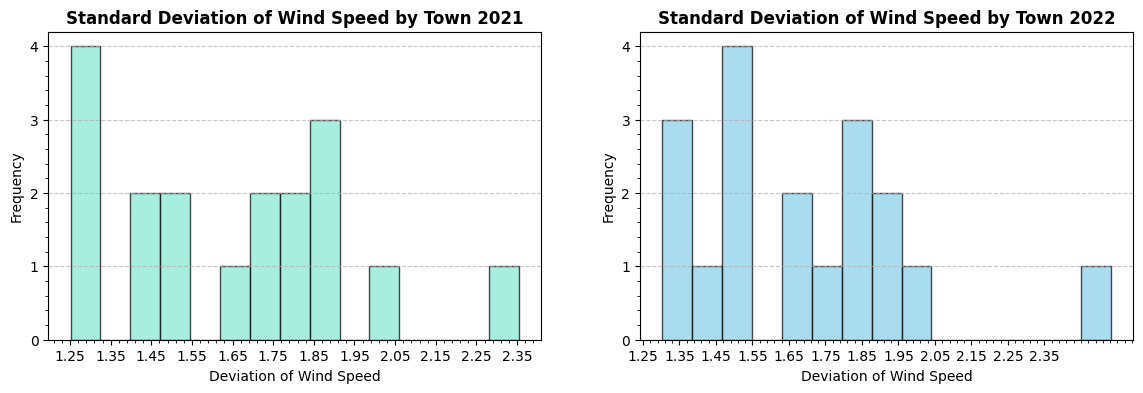

In [324]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[1].hist(wind_speed_std_by_town, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Standard Deviation of Wind Speed by Town 2022', fontweight='bold')
axes[1].set_xlabel('Deviation of Wind Speed')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].set_xticks(np.arange(min(wind_speed_std_by_town_2021), max(wind_speed_std_by_town_2021), 0.1).round(2))
axes[1].set_yticks(np.arange(0, 5, 1))
axes[1].minorticks_on()

axes[0].hist(wind_speed_std_by_town_2021, bins=15, color='#82e8d0', edgecolor='black', alpha=0.7)
axes[0].set_title('Standard Deviation of Wind Speed by Town 2021', fontweight='bold')
axes[0].set_xlabel('Deviation of Wind Speed')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[0].set_xticks(np.arange(min(wind_speed_std_by_town_2021), max(wind_speed_std_by_town_2021), 0.1).round(2))
axes[0].set_yticks(np.arange(0, 5, 1))
axes[0].minorticks_on()

plt.show()


### Calculating Condition Percentages in Lithuania for the 2021-2022 Period

In [325]:
condition_2021 = df_2021.groupby(['Condition Code'])['Condition Code'].count().sort_values(ascending=False)
sum_2021 = np.sum(condition_2021)

percentages_1 = []

for i in condition_2021:
    percentages_1.append((i * 100) / sum_2021)

percentages_1 = percentages_1[:10]
condition_text_1 = condition_2021.index[:10].tolist()

percentages_1.append(100 - np.sum(percentages_1))
condition_text_1.append('other')

condition_2022 = df_2022.groupby(['Condition Code'])['Condition Code'].count().sort_values(ascending=False)
sum_2022 = np.sum(condition_2022)

percentages_2 = []

for i in condition_2022:
    percentages_2.append((i * 100) / sum_2022)

percentages_2 = percentages_2[:10]
condition_text_2 = condition_2022.index[:10].tolist()

percentages_2.append(100 - np.sum(percentages_2))
condition_text_2.append('other')

df_display = pd.DataFrame(list(zip(percentages_1 + percentages_2, [2021]*len(percentages_1) + [2022]*len(percentages_2))), index=list(zip(condition_text_1 + condition_text_2)), columns=['Percentage', 'Year']).sort_values(by='Percentage', ascending=False)
df_display

,Percentage,Year
"(cloudy,)",29.045416,2022
"(cloudy,)",25.887909,2021
"(clear,)",23.698830,2022
"(clear,)",21.525095,2021
"(mist,)",10.274942,2021
"(mist,)",8.768223,2022
"(light-rain,)",8.519412,2022
"(light-rain,)",8.464205,2021
"(other,)",6.173551,2021
"(partly-cloudy,)",6.116525,2021


C:\Users\37062\AppData\Local\Temp\ipykernel_13684\1455545370.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3')


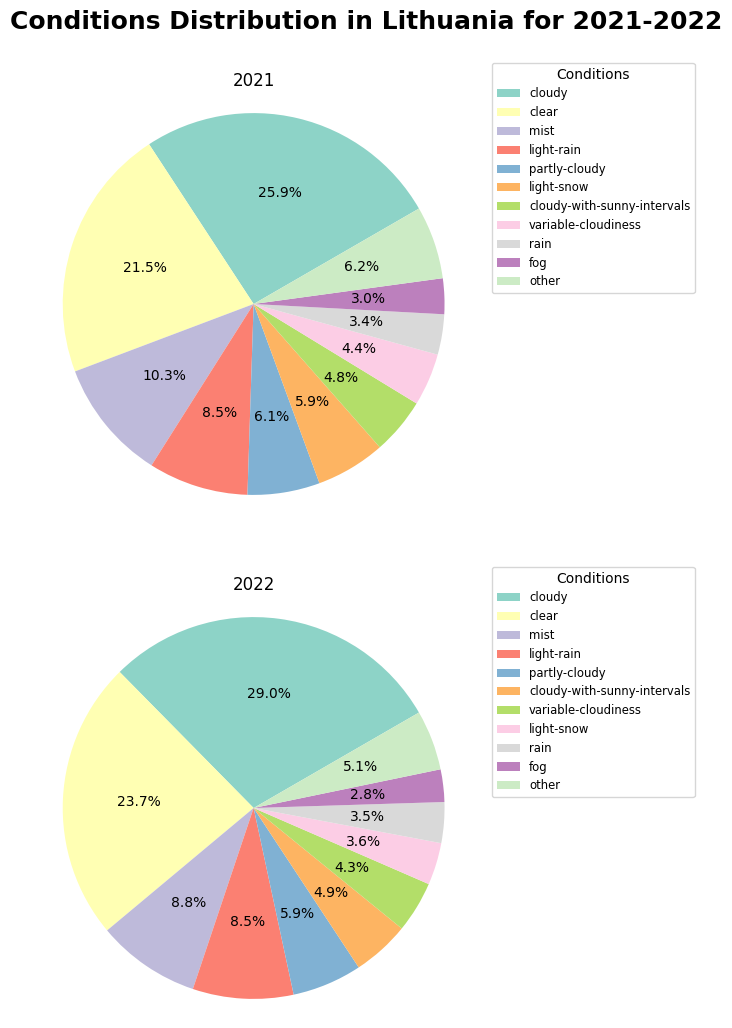

In [326]:
fig, axes = plt.subplots(2, 1, figsize=(6, 12))


colormap = plt.cm.get_cmap('Set3')
colors = colormap(np.arange(len(condition_text_1)))

axes[0].pie(percentages_1, labels=None, colors=colors, autopct='%1.1f%%', startangle=30, counterclock=True)
axes[0].legend(labels=condition_text_1, title='Conditions', loc='center left', bbox_to_anchor=(1, 0.8), fontsize='small')
axes[0].set_title('2021')
axes[0].axis('equal')

axes[1].pie(percentages_2, labels=None, colors=colors, autopct='%1.1f%%', startangle=30, counterclock=True)
axes[1].legend(labels=condition_text_2, title='Conditions', loc='center left', bbox_to_anchor=(1, 0.8), fontsize='small')
axes[1].set_title('2022')
axes[1].axis('equal')

plt.suptitle('Conditions Distribution in Lithuania for 2021-2022', x=0.7, y=0.95, ha='center', fontsize=18, fontweight='bold')
plt.show()